In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# **Business Understanding**

Kompetisi ini bertujuan untuk memprediksi durasi perjalanan taksi di New York City menggunakan data seperti waktu penjemputan, lokasi, dan jumlah penumpang. Metrik evaluasi yang digunakan adalah **Root Mean Squared Logarithmic Error (RMSLE)**, yang lebih fokus pada kesalahan prediksi relatif dan lebih toleran terhadap kesalahan pada nilai besar.

# **LOAD DATA**

In [8]:
train_df = pd.read_csv("./dataset/spaceship-titanic/train.csv")
test_df = pd.read_csv("./dataset/spaceship-titanic/test.csv")

In [9]:
display(train_df.head())
display(test_df.head())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# 1. **DATA UNDERSTANDING**

### **1.1 Tabel Field Data**

**Dataset: train.csv**

| Field Name        | Deskripsi                                                                                               |
|-------------------|---------------------------------------------------------------------------------------------------------|
| **PassengerId**    | Identifikasi unik untuk setiap penumpang. Formatnya adalah gggg_pp, di mana gggg menunjukkan grup dan pp adalah nomor penumpang dalam grup. |
| **HomePlanet**     | Planet asal penumpang, biasanya merupakan planet tempat tinggal tetapnya.                             |
| **CryoSleep**      | Menunjukkan apakah penumpang memilih untuk ditempatkan dalam keadaan suspend selama perjalanan. Penumpang dalam cryosleep terkurung di kabin mereka. |
| **Cabin**          | Nomor kabin tempat penumpang menginap, formatnya adalah deck/num/side, di mana side dapat berupa P (Port) atau S (Starboard). |
| **Destination**    | Planet tempat penumpang akan turun.                                                                    |
| **Age**            | Usia penumpang.                                                                                        |
| **VIP**            | Menunjukkan apakah penumpang telah membayar untuk layanan VIP khusus selama perjalanan.               |
| **RoomService**    | Jumlah yang dibebankan kepada penumpang untuk layanan kamar.                                           |
| **FoodCourt**      | Jumlah yang dibebankan kepada penumpang untuk makanan.                                                |
| **ShoppingMall**   | Jumlah yang dibebankan kepada penumpang untuk belanja.                                               |
| **Spa**            | Jumlah yang dibebankan kepada penumpang untuk layanan spa.                                            |
| **VRDeck**         | Jumlah yang dibebankan kepada penumpang untuk fasilitas VR.                                            |
| **Name**           | Nama depan dan belakang penumpang.                                                                     |
| **Transported**     | Menunjukkan apakah penumpang telah dipindahkan ke dimensi lain. Ini adalah target yang ingin diprediksi. |

### **Dataset: sample_submission.csv**

**Deskripsi:** File ini adalah file pengajuan dalam format yang benar.

| Field Name        | Deskripsi                                                                                               |
|-------------------|---------------------------------------------------------------------------------------------------------|
| **PassengerId**    | Identifikasi unik untuk setiap penumpang di set uji.                                                  |
| **Transported**     | Target yang harus diprediksi untuk setiap penumpang, yaitu apakah penumpang dipindahkan ke dimensi lain (True/False). |

## **1.2 Data Information**

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


## **1.3 Data Quality**

In [14]:
print("Training data")
display(train_df.isnull().sum())

print("Test data")
display(test_df.isnull().sum())

Training data


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Test data


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## **1.4 Data Duplicated**

In [23]:
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


## **1.5 Class Distribution**

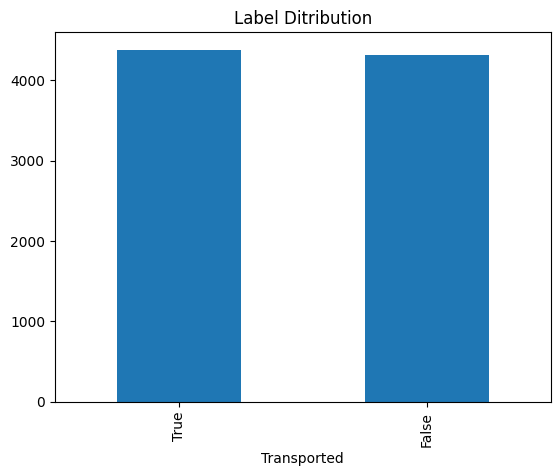

In [29]:
plt.title("Label Ditribution")
train_df['Transported'].value_counts().plot(kind='bar')
plt.show()

## **1.6 Feature Engineering**

In [30]:
# Pisahkan kolom Cabin menjadi Deck, Number, dan Side
train_df[['Deck', 'Number', 'Side']] = train_df['Cabin'].str.split('/', expand=True)

In [32]:
# Total pengeluaran
train_df['Total_Spending'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [33]:
# Membuat kolom baru untuk pasangan HomePlanet dan Destination
train_df['HomePlanet_Destination'] = train_df['HomePlanet'] + '_' + train_df['Destination']

In [35]:
# Ekstrak nama keluarga dengan pengecekan untuk nilai NaN
train_df['Family_Name'] = train_df['Name'].apply(lambda x: x.split()[-1] if pd.notna(x) else '')

In [37]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,Deck,Number,Side,Total_Spending,HomePlanet_Destination,Family_Name,Age_Filled_Mean,RoomService_Filled_Median,VIP_Filled_Mode
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,B,0,P,0.0,Europa_TRAPPIST-1e,Ofracculy,39.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,F,0,S,736.0,Earth_TRAPPIST-1e,Vines,24.0,109.0,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,A,0,S,10383.0,Europa_TRAPPIST-1e,Susent,58.0,43.0,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,A,0,S,5176.0,Europa_TRAPPIST-1e,Susent,33.0,0.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,F,1,S,1091.0,Earth_TRAPPIST-1e,Santantines,16.0,303.0,False


## **1.7 Data Cleaning**

In [36]:
# Menghitung modus untuk kolom 'VIP'
mode_vip = train_df['VIP'].mode()[0]  # Mengambil nilai modus

# Menghitung mean dan median untuk kolom 'Age' dan 'RoomService'
mean_age = train_df['Age'].mean()      # Menghitung mean
median_room_service = train_df['RoomService'].median()  # Menghitung median

# Membuat kolom baru untuk mengisi nilai NaN
train_df['Age_Filled_Mean'] = train_df['Age'].fillna(mean_age)  # Kolom baru dengan mean
train_df['RoomService_Filled_Median'] = train_df['RoomService'].fillna(median_room_service)  # Kolom baru dengan median
train_df['VIP_Filled_Mode'] = train_df['VIP'].fillna(mode_vip)  # Kolom baru dengan modus

## **1.8 Data Transformation**

In [39]:
# Inisialisasi scaler untuk standardisasi dan normalisasi
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Melakukan standardisasi
train_df['Age_Standardized'] = standard_scaler.fit_transform(train_df[['Age_Filled_Mean']])
train_df['RoomService_Standardized'] = standard_scaler.fit_transform(train_df[['RoomService_Filled_Median']])
train_df['Total_Spending_Standardized'] = standard_scaler.fit_transform(train_df[['Total_Spending']])

# Melakukan normalisasi
train_df['Age_Normalized'] = minmax_scaler.fit_transform(train_df[['Age_Filled_Mean']])
train_df['RoomService_Normalized'] = minmax_scaler.fit_transform(train_df[['RoomService_Filled_Median']])
train_df['Total_Spending_Normalized'] = minmax_scaler.fit_transform(train_df[['Total_Spending']])

In [40]:
# Label Encoding untuk kolom 'VIP'
label_encoder = LabelEncoder()
train_df['VIP_Encoded'] = label_encoder.fit_transform(train_df['VIP_Filled_Mode'])

# One-Hot Encoding untuk kolom 'HomePlanet'
df_one_hot = pd.get_dummies(train_df, columns=['HomePlanet'], drop_first=True)

In [41]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Age_Filled_Mean,RoomService_Filled_Median,VIP_Filled_Mode,Age_Standardized,RoomService_Standardized,Total_Spending_Standardized,Age_Normalized,RoomService_Normalized,Total_Spending_Normalized,VIP_Encoded
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,39.0,0.0,False,0.709437,-0.333105,-0.514066,0.493671,0.000000,0.000000,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,24.0,109.0,False,-0.336717,-0.168073,-0.251479,0.303797,0.007608,0.020452,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,58.0,43.0,True,2.034566,-0.268001,3.190333,0.734177,0.003001,0.288521,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,33.0,0.0,False,0.290975,-0.333105,1.332604,0.417722,0.000000,0.143830,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,16.0,303.0,False,-0.894666,0.125652,-0.124824,0.202532,0.021149,0.030317,0


# **2. Explanatory Data Analysis**

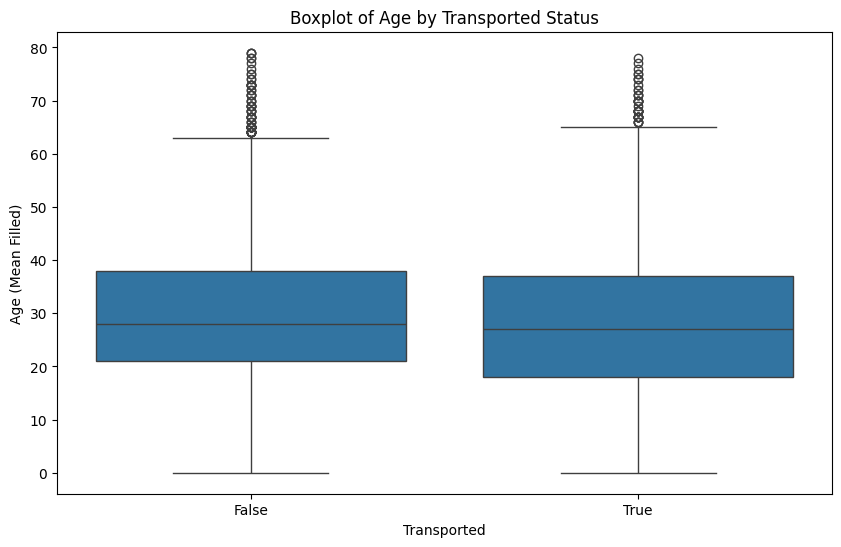

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur ukuran figure
plt.figure(figsize=(10, 6))

# Membuat boxplot untuk Age berdasarkan Transported
sns.boxplot(x='Transported', y='Age_Filled_Mean', data=train_df)
plt.title('Boxplot of Age by Transported Status')
plt.xlabel('Transported')
plt.ylabel('Age (Mean Filled)')
plt.show()


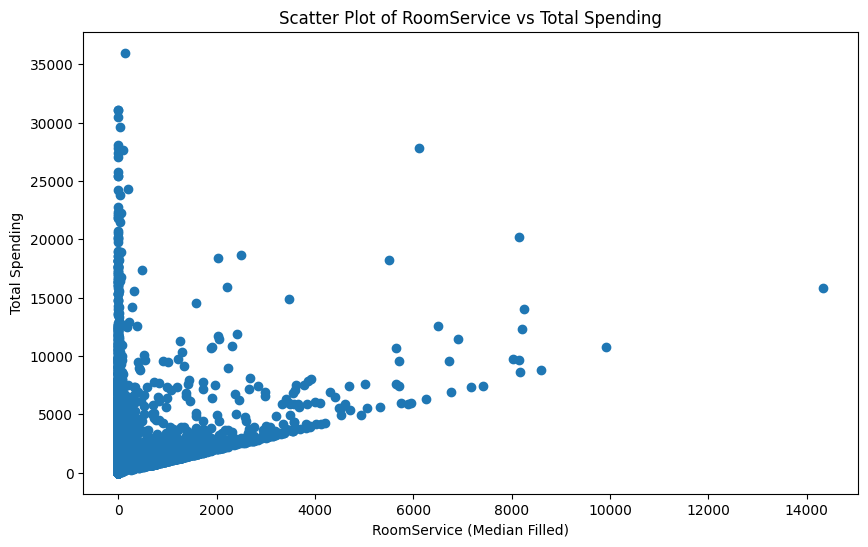

In [50]:
# Mengatur ukuran figure
plt.figure(figsize=(10, 6))

# Scatter plot untuk RoomService vs Total Spending
plt.scatter(train_df['RoomService_Filled_Median'], train_df['Total_Spending'])
plt.title('Scatter Plot of RoomService vs Total Spending')
plt.xlabel('RoomService (Median Filled)')
plt.ylabel('Total Spending')
plt.show()


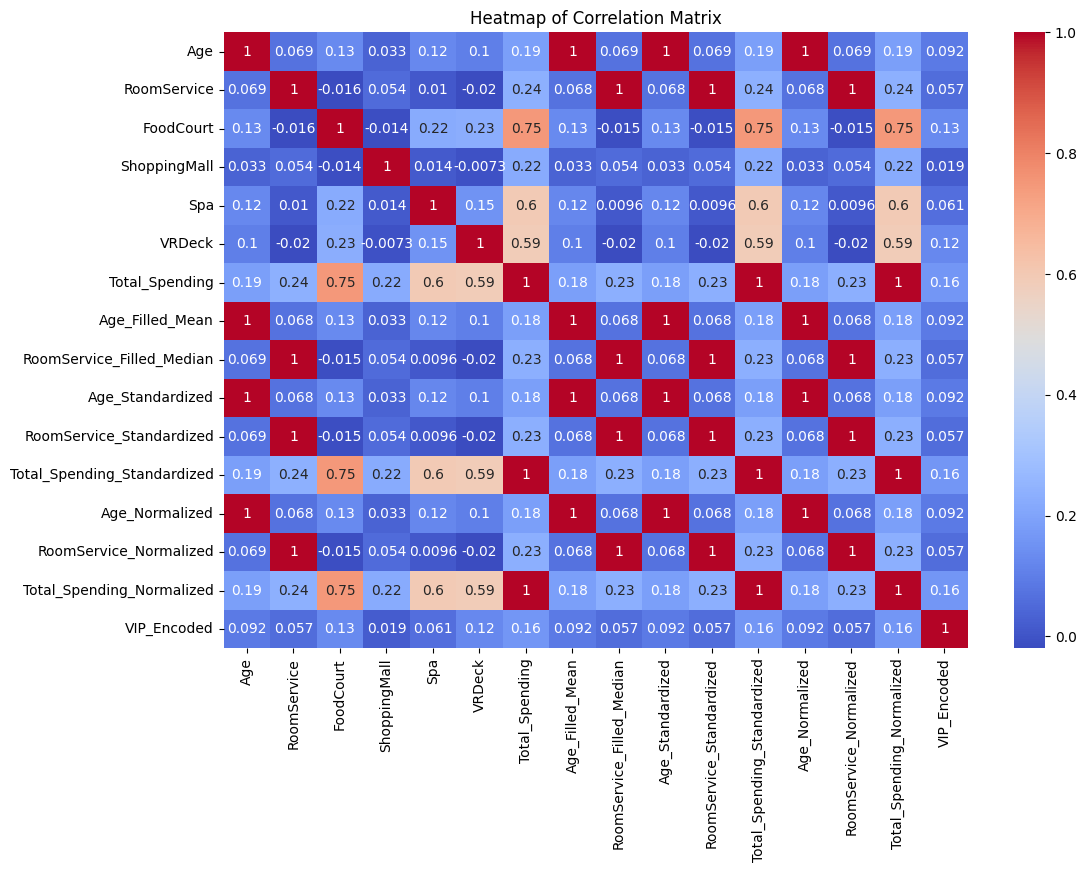

In [49]:
# Mengatur ukuran figure
plt.figure(figsize=(12, 8))

# Menghitung korelasi dan membuat heatmap
corr_matrix = train_df.select_dtypes('number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


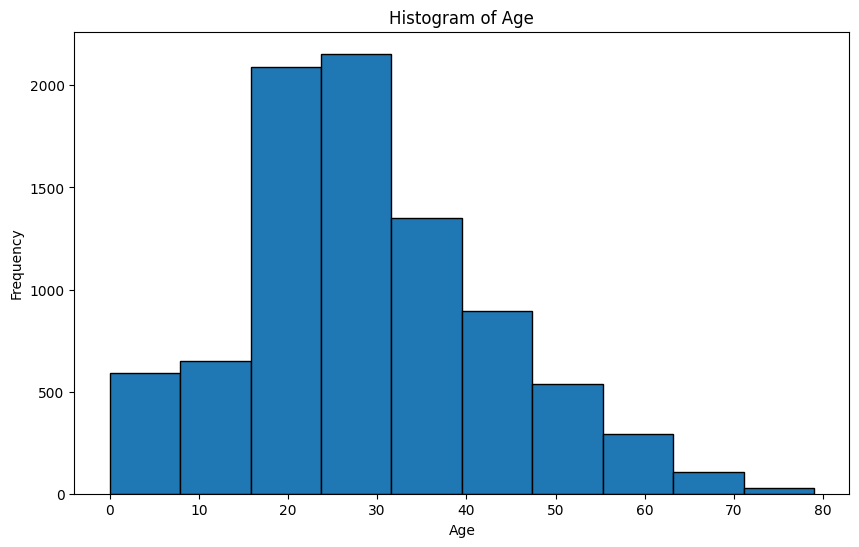

In [52]:
# Mengatur ukuran figure
plt.figure(figsize=(10, 6))

# Membuat histogram dari kolom 'Age'
plt.hist(train_df['Age_Filled_Mean'], bins=10, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()